# Processing biosignals in Friends Dataset
## physiological data preparation for Courtois-Neuromod
The notebook reviews general steps for the preparation of biosignals collected in the scanner (fMRI). We will firstly load information from processed biosignals, then we will inspect different layers of the pipeline in order to visualize the contribution of each of its parameters. We will give precedence to the PPG signal for parcimony. 

## Friends dataset
General description of the dataset

Physiological data acquisition equipment

Features of interest in the signals and how it can be merged to fMRI data

Table of contents:
1. Quality control summary
2. Inspection of parameters effects
3. Visualization of artefacts and systolic peaks intervals

#### Dependencies

In [1]:
# these are utilities
import pandas as pd
import numpy as np
import os
import glob
import pickle
import pprintpp

In [2]:
# these are biosignal processing packages
import neurokit2 as nk
import systole
import heartpy as hp

In [3]:
# these are visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# here we set our parameters to render figures
%pylab inline
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = (12.0, 6.0)  
plt.rcParams.update({'font.size': 14})

Populating the interactive namespace from numpy and matplotlib


In [5]:
import warnings
warnings.filterwarnings("ignore")

## 1. Quality Control
We fetch indices of physiological activty processed by our pipeline. The details of the pipeline will be discussed in further details in the next section. 

We breakdown our quality control procedure by following guidelines reported by [Quintanna, Alvares & Heathers, 2016](https://www.nature.com/articles/tp201673) (see Figure 1). Essentially, every PPG signal is automatically processed,then  subsets of data are visually inspected based on quality assessment features, including the number of artefacts detected and the convergence of results between different biosignal processing tools. We use NeuroKit, systole and HeartPy packages to process the PPG signal.   

In [6]:
# data label
indir = "/scratch/flesp/physio_data/friends1/viz/"
root = "/scratch/flesp/physio_data/friends1/"
sub=['sub-01', 'sub-02','sub-03', 'sub-04','sub-05', 'sub-06']

In [7]:
# Fetching stored data
# iterate through subjects/sessions and print progress
df = pd.DataFrame()
for s in sub:
    print(s)
    print("~"*30)
    meta = pd.read_json(f"{root}/{s}/{s}_volumes_all-ses-runs.json")
    
    for ses in meta.keys():
        print(f"Currently processing {ses}")
        json = glob.glob(f"{indir}{s}/{ses}/*.json")
        json.sort()
        if len(json)==0:
            print('empty session')
        # read each file in a subject/session
        for i, info in enumerate(json):
            here = info.rfind('task')
            there = info.rfind('_')
            task = info[here:there]
            with open(info, 'rb') as f:
                tmp = pickle.load(f)

            try:
                nb_vol=meta[ses][f"{i+1:02d}"]

                if nb_vol is np.nan:
                    nb_vol=int(0)
            except KeyError:
                print(f"skipping {ses} run-{i:02d}")
                continue
            print("fetching run info:", task)
            if len(tmp['PPG_clean_rr_systole'])<400:
                print('not enough RRIs:', task)
                continue
            # create a new row in the dataframe with artefacts count and mean interbeat interval
            new_row = {'ectopic':tmp['PPG_ectopic'], 
                       'short':tmp['PPG_short'], 'extra':tmp['PPG_extra'],
                       'long': tmp['PPG_long'], 'missed':tmp['PPG_missed'], 
                       'mean_rr_systole': np.mean(tmp['PPG_clean_rr_systole']),
                       'std_rr_systole': np.std(tmp['PPG_clean_rr_systole']),
                       'std_rr_hp': np.std(tmp['PPG_clean_rr_hp']),
                       'mean_rr_heartpy': np.mean(tmp['PPG_clean_rr_hp']),
                       'task': task, 'run_id': i+1, 'session_id':ses, 'subject': s,
                       'filename': json[i], 'nb_vol':int(nb_vol)}
            df = df.append(new_row,ignore_index=True)

df.to_csv('result.csv')

sub-01
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Currently processing ses-001
fetching run info: task-s01e01a
fetching run info: task-s01e01b
fetching run info: task-s01e02a
fetching run info: task-s01e02b
Currently processing ses-002
fetching run info: task-s01e03a
fetching run info: task-s01e03b
fetching run info: task-s01e04a
fetching run info: task-s01e04b
Currently processing ses-003
fetching run info: task-s01e05a
fetching run info: task-s01e05b
fetching run info: task-s01e06a
fetching run info: task-s01e06b
Currently processing ses-004
fetching run info: task-s01e07a
fetching run info: task-s01e07b
fetching run info: task-s01e08a
fetching run info: task-s01e08b
fetching run info: task-s01e09a
fetching run info: task-s01e09b
Currently processing ses-005
fetching run info: task-s01e10a
fetching run info: task-s01e10b
fetching run info: task-s01e11a
fetching run info: task-s01e11b
Currently processing ses-006
fetching run info: task-s01e12a
fetching run info: task-s01e12b
fetching run info: t

fetching run info: task-s01e19b
fetching run info: task-s01e20a
fetching run info: task-s01e20b
fetching run info: task-s01e21a
fetching run info: task-s01e21b
Currently processing ses-009
fetching run info: task-s01e22a
fetching run info: task-s01e22b
fetching run info: task-s01e23a
fetching run info: task-s01e23b
fetching run info: task-s01e24a
fetching run info: task-s01e24b
Currently processing ses-010
fetching run info: task-s02e01a
fetching run info: task-s02e01b
fetching run info: task-s02e02a
fetching run info: task-s02e02b
fetching run info: task-s02e03a
Currently processing ses-011
fetching run info: task-s02e04a
fetching run info: task-s02e04b
fetching run info: task-s02e05a
fetching run info: task-s02e05b
fetching run info: task-s02e06a
fetching run info: task-s02e06b
Currently processing ses-012
empty session
Currently processing ses-013
fetching run info: task-s02e10a
fetching run info: task-s02e10b
fetching run info: task-s02e11a
fetching run info: task-s02e11b
fetching 

fetching run info: task-s02e15a
fetching run info: task-s02e15b
not enough RRIs: task-s02e15b
Currently processing ses-021
fetching run info: task-s02e16a
fetching run info: task-s02e16b
fetching run info: task-s02e17a
fetching run info: task-s02e17b
Currently processing ses-022
fetching run info: task-s02e18a
fetching run info: task-s02e18b
Currently processing ses-023
fetching run info: task-s02e19a
fetching run info: task-s02e19b
fetching run info: task-s02e20a
fetching run info: task-s02e20b
Currently processing ses-024
fetching run info: task-s02e21a
fetching run info: task-s02e21b
fetching run info: task-s02e22a
fetching run info: task-s02e22b
Currently processing ses-025
empty session
Currently processing ses-026
fetching run info: task-s02e07a
fetching run info: task-s02e07b
Currently processing ses-027
empty session
Currently processing ses-028
fetching run info: task-s03e02a
fetching run info: task-s03e02b
fetching run info: task-s03e03a
fetching run info: task-s03e03b
Curren

fetching run info: task-s01e24a
fetching run info: task-s01e24b
Currently processing ses-012
fetching run info: 
fetching run info: 
fetching run info: 
fetching run info: 
fetching run info: 
fetching run info: 
fetching run info: 
fetching run info: 
Currently processing ses-013
fetching run info: task-s02e02a
fetching run info: task-s02e02b
fetching run info: task-s02e03a
fetching run info: task-s02e03b
Currently processing ses-014
fetching run info: task-s02e04a
fetching run info: task-s02e04b
fetching run info: task-s02e05a
fetching run info: task-s02e05b
fetching run info: task-s02e06a
fetching run info: task-s02e06b
fetching run info: task-s02e07a
fetching run info: task-s02e07b
Currently processing ses-015
fetching run info: task-s02e08a
fetching run info: task-s02e08b
fetching run info: task-s02e09a
fetching run info: task-s02e09b
fetching run info: task-s02e10a
fetching run info: task-s02e10b
Currently processing ses-016
fetching run info: task-s02e11a
fetching run info: task

fetching run info: task-s02e18a
fetching run info: task-s02e18b
Currently processing ses-010
fetching run info: task-s02e19a
fetching run info: task-s02e19b
fetching run info: task-s02e20a
fetching run info: task-s02e20b
Currently processing ses-011
empty session
Currently processing ses-012
fetching run info: task-s01e02a
not enough RRIs: task-s01e02a
fetching run info: task-s01e02b
fetching run info: task-s01e03a
not enough RRIs: task-s01e03a
fetching run info: task-s01e03b
Currently processing ses-013
fetching run info: task-s03e01a
fetching run info: task-s03e01b
fetching run info: task-s03e02a
fetching run info: task-s03e02b
fetching run info: task-s03e03a
fetching run info: task-s03e03b
fetching run info: task-s03e04a
fetching run info: task-s03e04b
fetching run info: task-s03e05a
fetching run info: task-s03e05b
Currently processing ses-014
fetching run info: task-s03e06a
fetching run info: task-s03e06b
fetching run info: task-s03e07a
fetching run info: task-s03e07b
fetching run 

fetching run info: task-s04e17b
fetching run info: task-s04e18a
fetching run info: task-s04e18b
fetching run info: task-s04e19a
fetching run info: task-s04e19b
Currently processing ses-026
fetching run info: task-s04e20a
fetching run info: task-s04e20b
fetching run info: task-s04e21a
fetching run info: task-s04e21b
fetching run info: task-s04e22a
fetching run info: task-s04e22b
Currently processing ses-027
empty session
Currently processing ses-028
fetching run info: task-s05e01a
fetching run info: task-s05e01b
fetching run info: task-s05e02a
fetching run info: task-s05e02b
fetching run info: task-s05e03a
fetching run info: task-s05e03b
Currently processing ses-029
fetching run info: 
fetching run info: 
fetching run info: 
fetching run info: 
Currently processing ses-030
fetching run info: task-s05e06a
fetching run info: task-s05e06b
fetching run info: task-s05e07a
fetching run info: task-s05e07b
fetching run info: task-s05e08a
fetching run info: task-s05e08b
Currently processing ses-

In [8]:
clean_df = df.drop(df[(df['mean_rr_systole']>1200) | 
                      ((df['mean_rr_heartpy']<700) & (df['mean_rr_systole']<600)) | 
                      (df['std_rr_systole']>275) | 
                      (df['mean_rr_systole']-df['mean_rr_heartpy']>300)].index)
#clean_df = df
clean_df.to_csv("/scratch/flesp/physio_data/friends1/pilot_hr-isc.csv")

In [69]:
ok_task=[]
for task in pd.unique(clean_df['task'].unique()):
    tmp = clean_df[clean_df['task']==task]
    if len(tmp)>=4:
        ok_task.append(task)
        
print(len(ok_task), len(pd.unique(clean_df['task'].unique())))

138 234


# 2. Processing

#### Import home functions

In [12]:
%run ~/cneuromod/ds_prep/physio/preproc/neuromod_process.py

#### Fetch data

In [13]:
fn = "/scratch/flesp/physio_data/friends1/sub-01/sub-01_volumes_all-ses-runs.json"
metadata = pd.read_json(fn)
filename = "/scratch/flesp/physio_data/friends1/sub-01/ses-002/sub-01_ses-002_task-s01e04b_physio"
filename[filename.rfind('/')+1:]

'sub-01_ses-002_task-s01e04b_physio'

In [14]:
json=pd.read_json(f"{filename}.json")
fs = json['SamplingFrequency'][0]

In [15]:
bio_df = pd.read_csv(f"{filename}.tsv.gz",
                     sep='\t',
                     compression='gzip',
                     header=None,
                     names=json.Columns)

#### Processing functions for neuromod PPG

In [16]:
signals, info_corrected = neuromod_ppg_process(bio_df['PPG'], fs)

PPG Cleaned
HeartPy processing started

Finished in 27.05536 sec
Heartpy found peaks
Neurokit found peaks
Cleaning the RR interval time series using 4 iterations.
 - Iteration 1 - 
... correcting 8 ectopic interval(s).
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
Cleaning the peaks vector using 4 iterations.
 - Iteration 1 - 
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
systole corrected RR series


In [17]:
signals.head()

,PPG_Raw,PPG_Clean,PPG_Peaks_NK,PPG_Peaks_HP,PPG_Peaks_Systole,PPG_Rate
0,-0.042419,0.0,0.0,0.0,0.0,67.069719
1,-0.042419,0.0,0.0,0.0,0.0,67.069719
2,-0.041809,0.0,0.0,0.0,0.0,67.069719
3,-0.042419,0.0,0.0,0.0,0.0,67.069719
4,-0.042114,0.0,0.0,0.0,0.0,67.069719


In [18]:
info_corrected.keys()

dict_keys(['PPG_Peaks', 'PPG_ectopic', 'PPG_short', 'PPG_clean_rr_systole', 'PPG_clean_rr_hp', 'PPG_long', 'PPG_extra', 'PPG_missed', 'PPG_rejected_segments', 'PPG_Peaks_corrected', 'PPG_cumulseconds_rejected', 'PPG_%_rejected_segments'])

### Interactive visualization

In [19]:
plot = systole.plots.plot_raw(signals['PPG_Raw'], backend='bokeh', show_heart_rate=True, show_artefacts=True, sfreq=fs)

In [20]:
from bokeh.io import output_notebook
from bokeh.plotting import show, output_file, save
output_notebook()

show(plot)

Loading BokehJS ...

In [21]:
plot_rr = systole.plots.plot_rr(info_corrected['PPG_clean_rr_systole'],input_type='rr_ms',backend='bokeh', show_artefacts=True)

In [22]:
output_notebook()

show(plot_rr)

Loading BokehJS ...

#### Visualize low-level processing

In [23]:
signal = bio_df['PPG']
downsampled_interpolation = nk.signal_resample(signal, method="interpolation",
                                               sampling_rate=10000,desired_sampling_rate=1000)

In [24]:
filt = nk.signal_filter(signal, fs, lowcut=0.5, highcut=8, order=3)
interp = nk.signal_filter(downsampled_interpolation, 1000, lowcut=0.5, highcut=40, order=3)
detrend = nk.signal_detrend(signal, order=2 )

Text(0.5, 1.0, 'Excerpt of Raw PPG Signal')

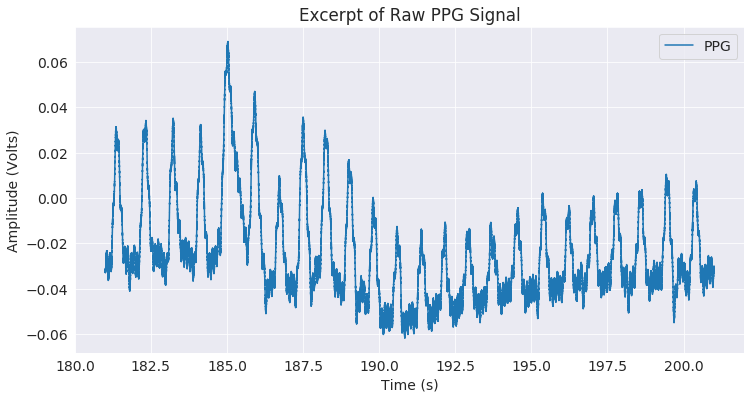

In [25]:
bio_df[['PPG','time']][1900000:2100000].plot(x='time')
plt.ylabel('Amplitude (Volts)')
plt.xlabel('Time (s)')
plt.title("Excerpt of Raw PPG Signal")

Text(0.5, 1.0, 'Excerpt of Clean PPG Signal')

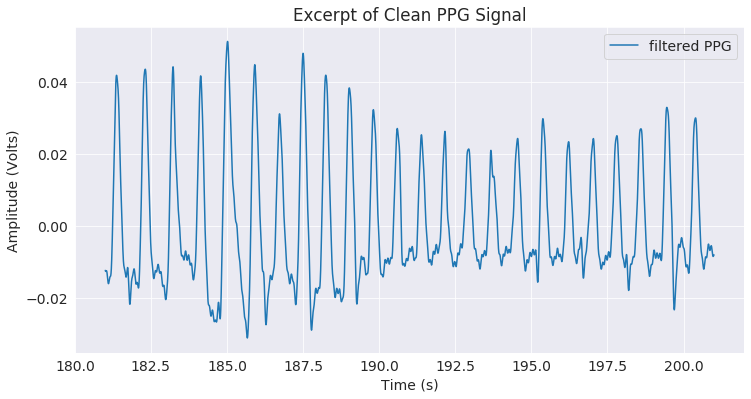

In [26]:
df_filt = pd.DataFrame({'time': bio_df['time'], 'filtered PPG':filt})
df_filt[1900000:2100000].plot(x='time')
plt.ylabel('Amplitude (Volts)')
plt.xlabel('Time (s)')
plt.title("Excerpt of Clean PPG Signal")

Text(0.5, 1.0, 'Excerpt of uncorrected systolic peak detection on filtered PPG')

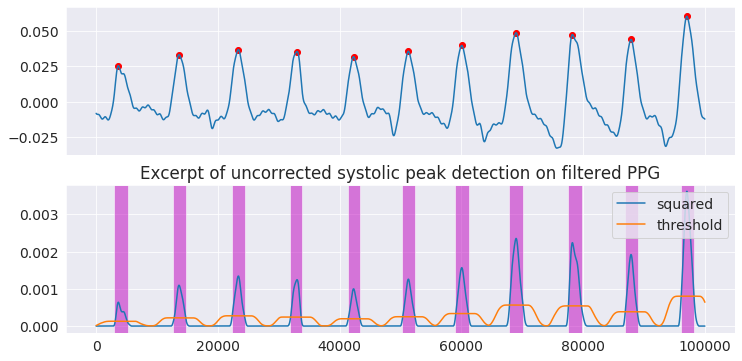

In [27]:
info = nk.ppg_findpeaks(filt[250000:350000], fs, show=True)
plt.title('Excerpt of uncorrected systolic peak detection on filtered PPG')

Text(0.5, 1.0, 'Longer excerpt of uncorrected systolic peak detection on filtered PPG')

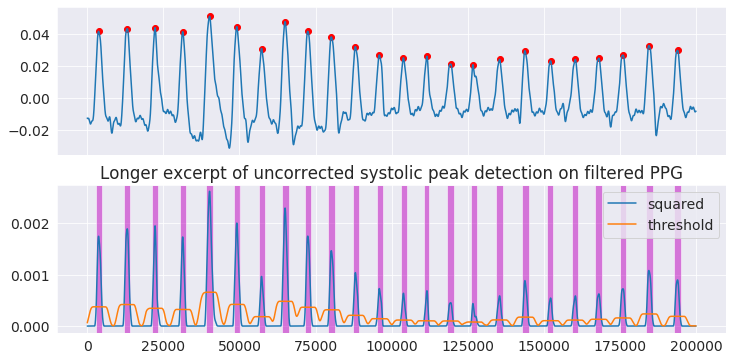

In [28]:
info = nk.ppg_findpeaks(filt[1900000:2100000], fs, show=True)
plt.title('Longer excerpt of uncorrected systolic peak detection on filtered PPG')

Text(0.5, 1.0, 'Excerpt of uncorrected systolic peak detection on interpolated and filtered PPG')

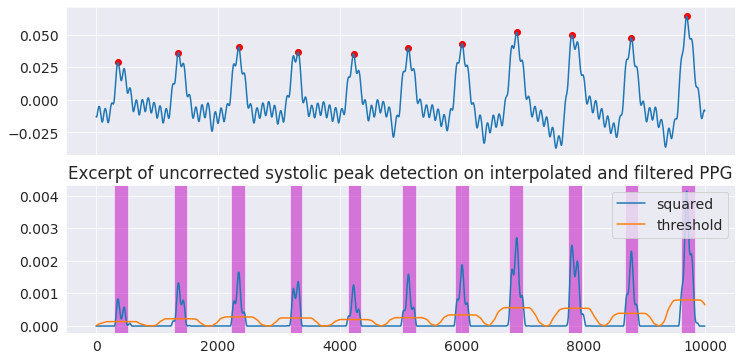

In [29]:
info = nk.ppg_findpeaks(interp[25000:35000], show=True)
plt.title('Excerpt of uncorrected systolic peak detection on interpolated and filtered PPG')

Text(0.5, 1.0, 'Longer excerpt of uncorrected systolic peak detection on interpolated and filtered PPG')

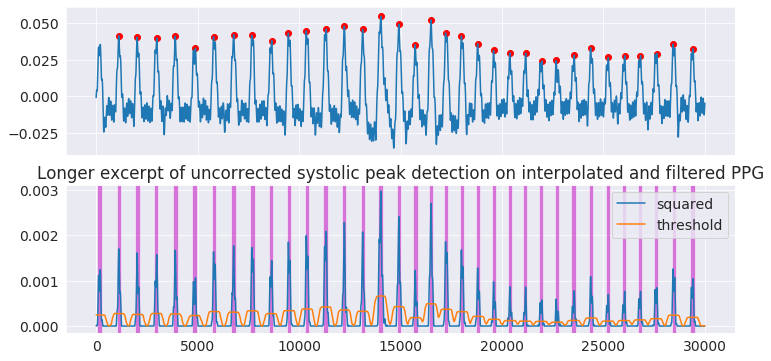

In [30]:
info = nk.ppg_findpeaks(interp[180000:210000], show=True)
plt.title('Longer excerpt of uncorrected systolic peak detection on interpolated and filtered PPG')

Text(0.5, 1.0, 'Excerpt of uncorrected systolic peak detection on detrended Raw PPG')

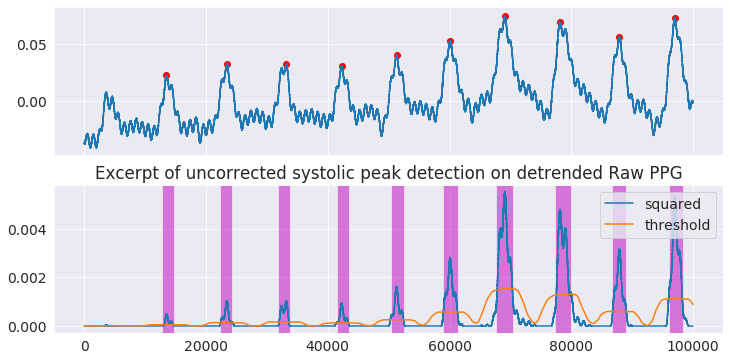

In [31]:
info = nk.ppg_findpeaks(detrend[250000:350000], fs, show=True)
plt.title('Excerpt of uncorrected systolic peak detection on detrended Raw PPG')

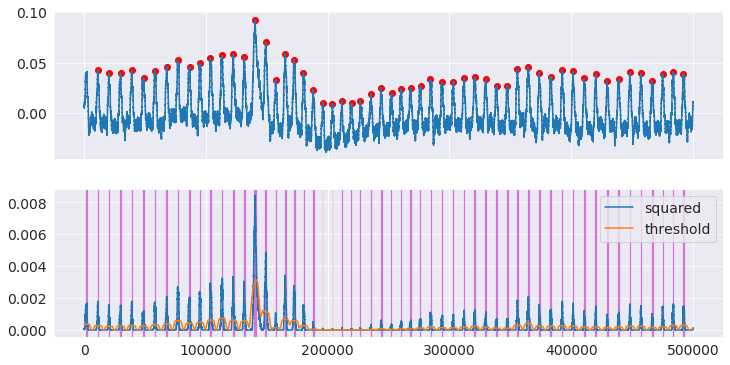

In [32]:
info = nk.ppg_findpeaks(detrend[1800000:2300000], fs, show=True)

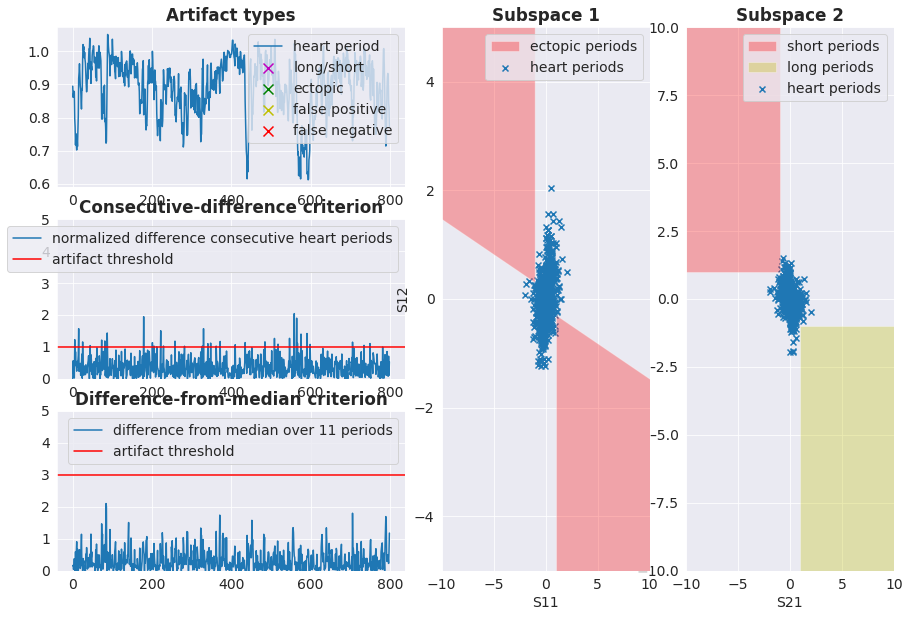

In [33]:
info = nk.ppg_findpeaks(filt, fs)
artefacts, info1 = nk.signal_fixpeaks(info, sampling_rate=fs,  iterative=True, show=True, method="Kubios")

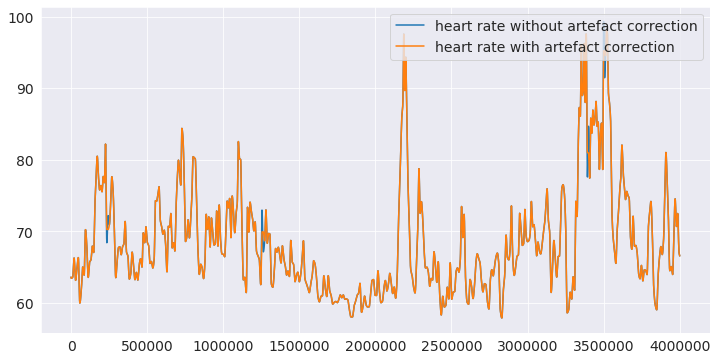

In [34]:
rate_corrected = nk.signal_rate(info1,fs, desired_length=len(bio_df))
rate_uncorrected = nk.signal_rate(info,fs, desired_length=len(bio_df))
fig, ax = plt.subplots()
ax.plot(rate_uncorrected[1800000:5800000], label="heart rate without artefact correction")
ax.plot(rate_corrected[1800000:5800000], label="heart rate with artefact correction")
ax.legend(loc="upper right")

## High-level main function for all biosignals

In [35]:
bio_proc, bio_info = neuromod_bio_process(df=bio_df, sampling_rate=fs)

Reading pandas DataFrame
PPG Cleaned
HeartPy processing started

Finished in 26.84656 sec
Heartpy found peaks
Neurokit found peaks
Cleaning the RR interval time series using 4 iterations.
 - Iteration 1 - 
... correcting 8 ectopic interval(s).
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
Cleaning the peaks vector using 4 iterations.
 - Iteration 1 - 
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
systole corrected RR series
Respiration workflow: done
Electrodermal activity workflow: done


In [36]:
bio_proc.keys()

Index(['PPG_Raw', 'PPG_Clean', 'PPG_Peaks_NK', 'PPG_Peaks_HP',
       'PPG_Peaks_Systole', 'PPG_Rate', 'ECG', 'RSP_Raw', 'RSP_Clean',
       'RSP_Amplitude', 'RSP_Rate', 'RSP_Phase', 'RSP_Phase_Completion',
       'RSP_Peaks', 'RSP_Troughs', 'EDA_Raw', 'EDA_Clean', 'EDA_Tonic',
       'EDA_Phasic', 'SCR_Onsets', 'SCR_Peaks', 'SCR_Height', 'SCR_Amplitude',
       'SCR_RiseTime', 'SCR_Recovery', 'SCR_RecoveryTime', 'TTL', 'time'],
      dtype='object')

In [37]:
bio_info.keys()

dict_keys(['PPG_Peaks', 'PPG_ectopic', 'PPG_short', 'PPG_clean_rr_systole', 'PPG_clean_rr_hp', 'PPG_long', 'PPG_extra', 'PPG_missed', 'PPG_rejected_segments', 'PPG_Peaks_corrected', 'PPG_cumulseconds_rejected', 'PPG_%_rejected_segments', 'RSP_Peaks', 'RSP_Troughs', 'sampling_rate', 'SCR_Onsets', 'SCR_Peaks', 'SCR_Height', 'SCR_Amplitude', 'SCR_RiseTime', 'SCR_Recovery', 'SCR_RecoveryTime'])

Text(0.5, 0, 'time (s)')

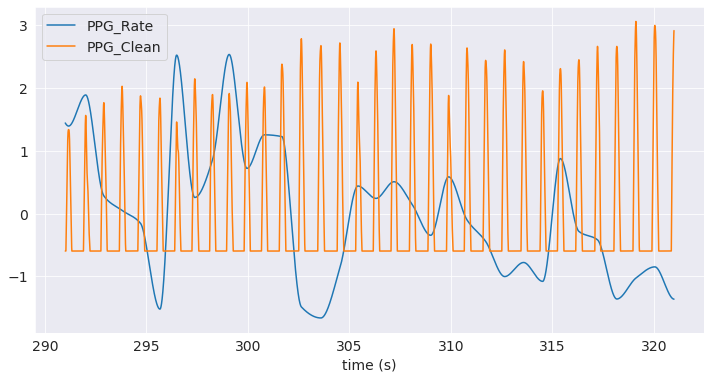

In [38]:
df1 = nk.standardize(bio_proc[['PPG_Rate', 'PPG_Clean']][3000000:3300000])
df1['time'] = bio_proc['time'][3000000:3300000]
df1.plot(x='time')
plt.xlabel('time (s)')

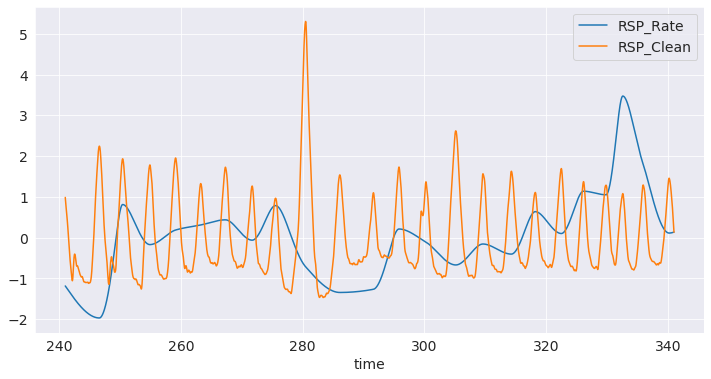

In [39]:
df1 = nk.standardize(bio_proc[['RSP_Rate', 'RSP_Clean']][2500000:3500000])
df1['time'] = bio_proc['time'][2500000:3500000]
df1.plot(x='time')

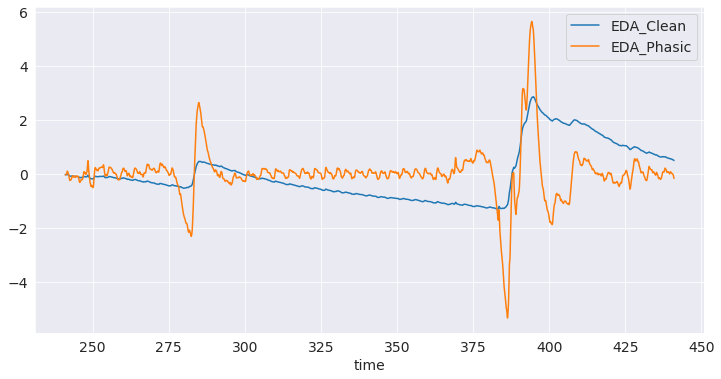

In [40]:
df1 = nk.standardize(bio_proc[['EDA_Clean', 'EDA_Phasic']][2500000:4500000])
df1['time'] = bio_proc['time'][2500000:4500000]
df1.plot(x='time')

# Visualize
## Mean RR intervals

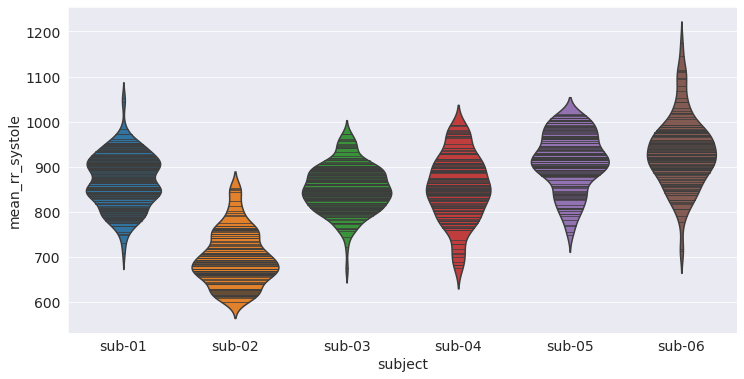

In [46]:
dist = sns.violinplot(data=clean_df, x='subject',y='mean_rr_systole', inner='stick', bw=0.3)

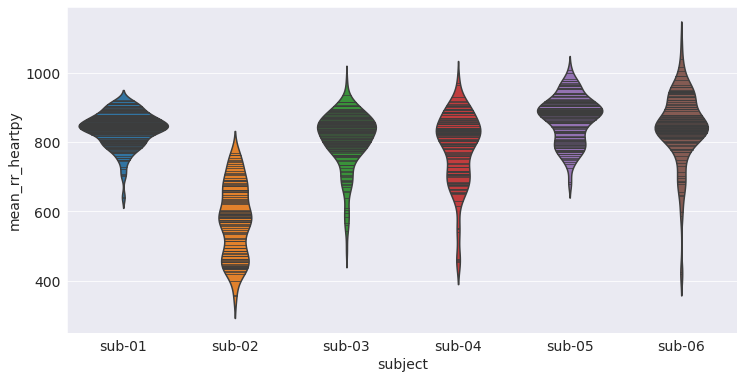

In [47]:
dist = sns.violinplot(data=clean_df, x='subject',y='mean_rr_heartpy', inner='stick', bw=0.3)

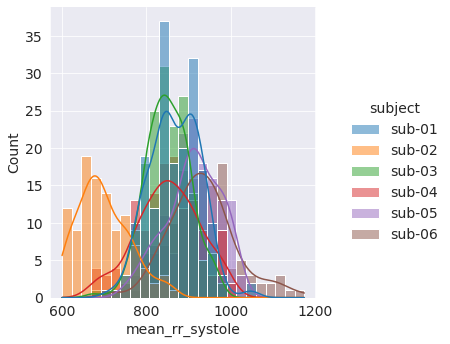

In [48]:
sns.displot(data=clean_df, x='mean_rr_systole', hue='subject', kde=True)

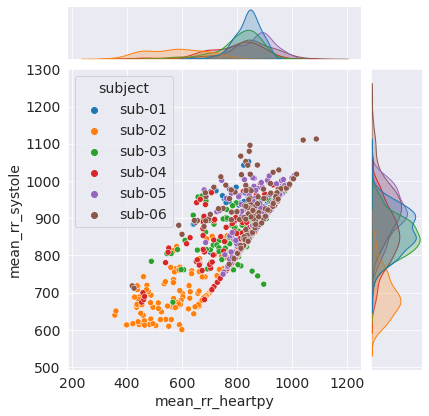

In [49]:
sns.jointplot(x='mean_rr_heartpy', y='mean_rr_systole',hue='subject', data=clean_df)

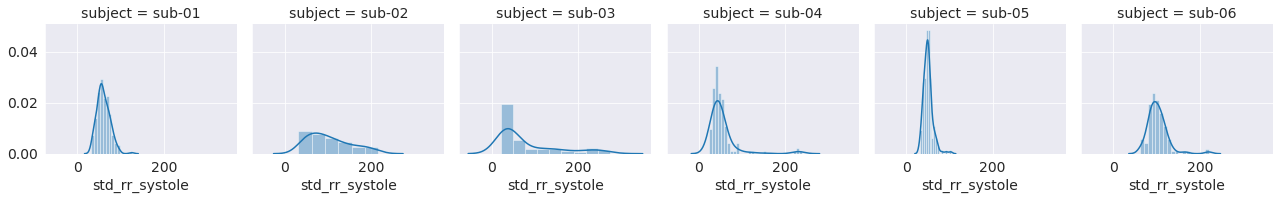

In [50]:
g = sns.FacetGrid(clean_df, col="subject", palette='Set3' )
g.map(sns.distplot, "std_rr_systole", )

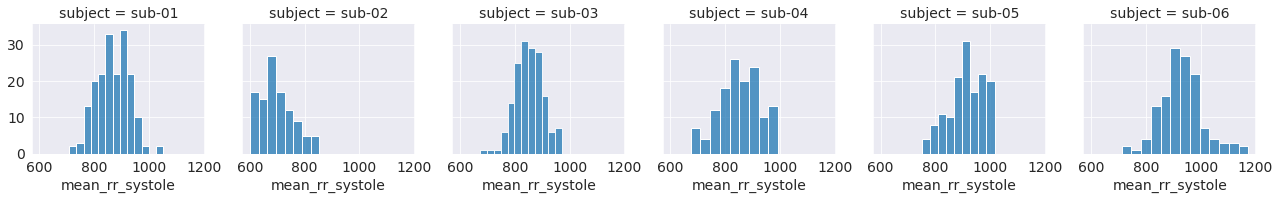

In [51]:
g = sns.FacetGrid(clean_df, col="subject", palette='Set3' )
g.map(sns.histplot, "mean_rr_systole", )

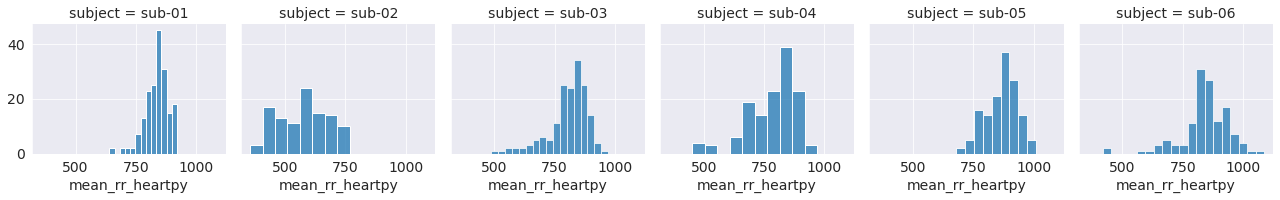

In [52]:
g = sns.FacetGrid(clean_df, col="subject", palette='Set3' )
g.map(sns.histplot, "mean_rr_heartpy")

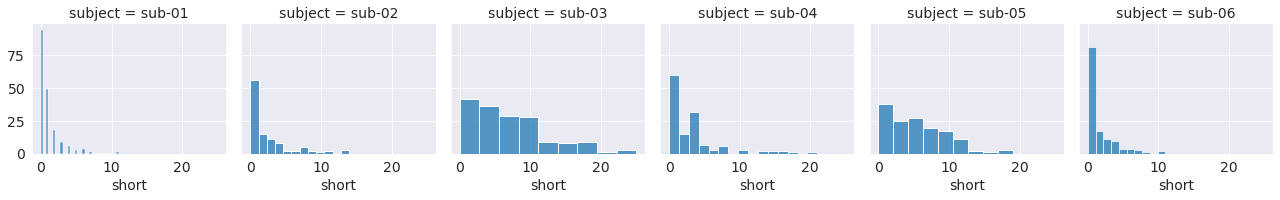

In [60]:
g = sns.FacetGrid(clean_df, col="subject", palette='Set3' )
g.map(sns.histplot, "short", )

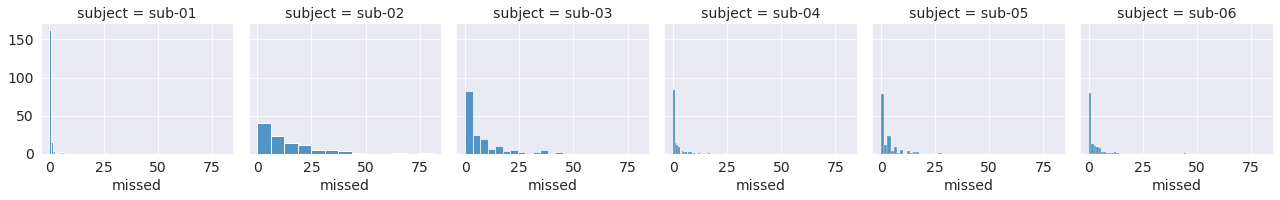

In [61]:
g = sns.FacetGrid(clean_df, col="subject", palette='Set3' )
g.map(sns.histplot, "missed", )

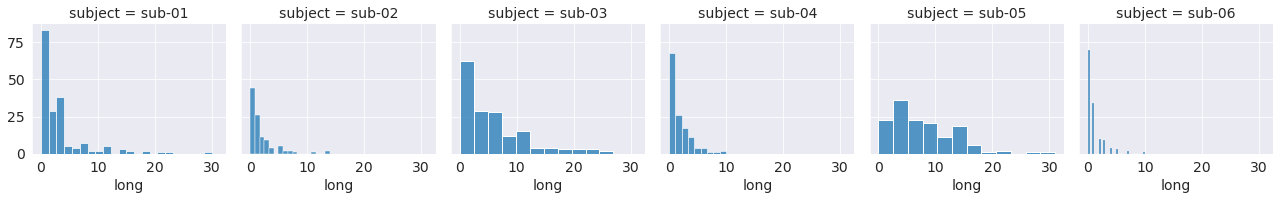

In [62]:
g = sns.FacetGrid(clean_df, col="subject", palette='Set3' )
g.map(sns.histplot, "long", )

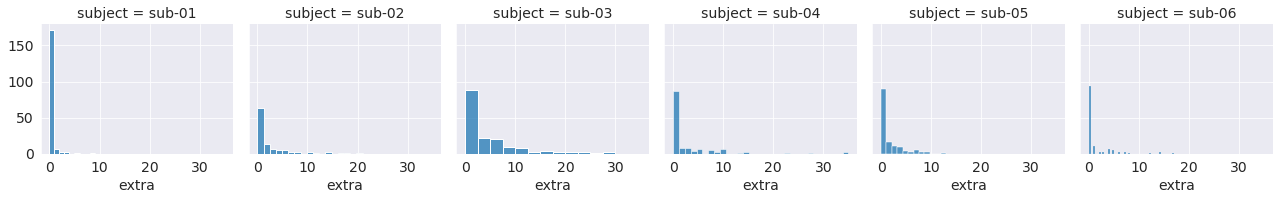

In [63]:
g = sns.FacetGrid(clean_df, col="subject", palette='Set3' )
g.map(sns.histplot, "extra", )

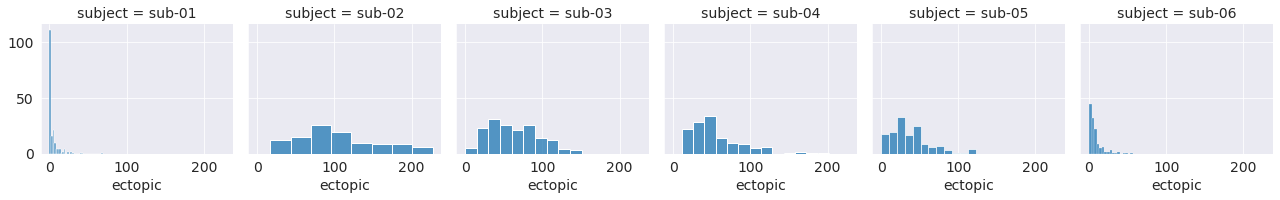

In [64]:
g = sns.FacetGrid(clean_df, col="subject", palette='Set3' )
g.map(sns.histplot, "ectopic", )